In [28]:
import polars as pl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

data_dir = Path("../data")

full = pl.scan_parquet(data_dir / "joined_data_train_3.parquet")

In [ ]:
df = (
  full.with_columns([
    pl.col("transaction_start").dt.year().alias("year"),
    pl.col("transaction_start").dt.month().alias("month"),
  ])
  .group_by(["year", "month"])
  .agg([
    pl.col("camera_product_similar").mean().alias("mean_camera_product_similar"),
    pl.col("camera_certainty").mean().alias("mean_camera_certainty"),
  ])
).sort(["year", "month"]).collect().to_pandas()


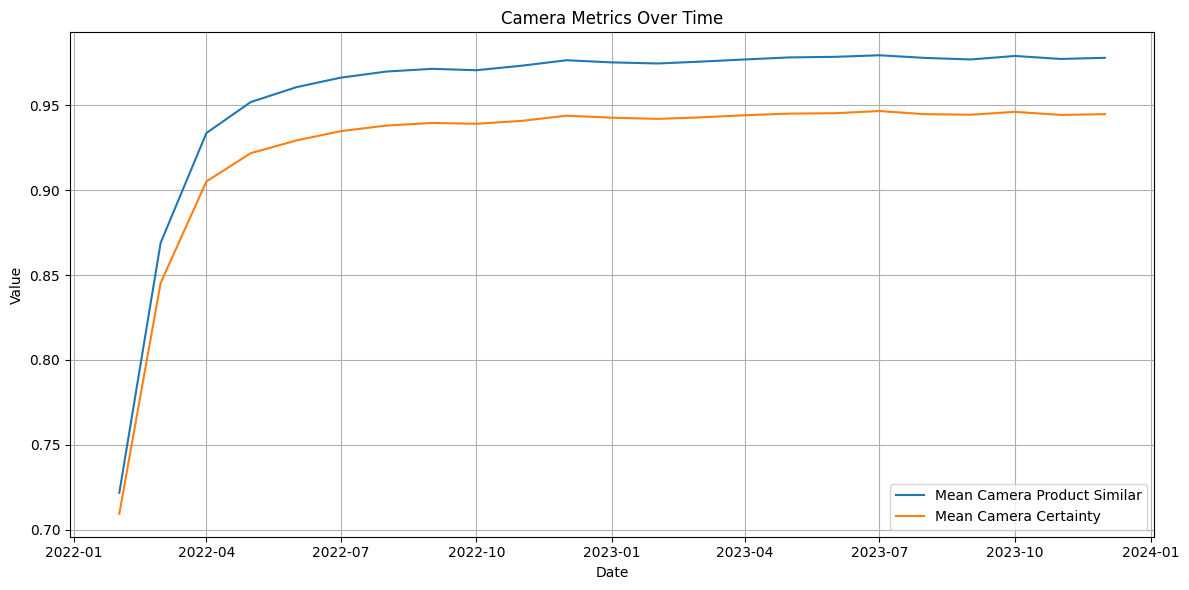

In [30]:
# Assuming `df` is your final DataFrame
df['date'] = pd.to_datetime(df[['year', 'month']].assign(day=1))

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['mean_camera_product_similar'], label='Mean Camera Product Similar')
plt.plot(df['date'], df['mean_camera_certainty'], label='Mean Camera Certainty')

plt.title('Camera Metrics Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()